### Solution to questions:

1)Data cleaning including missing values, outliers and multi-collinearity.

There are no missing values in the dataset
Outlier are taken care by techniques like the IQR method or z-score in numerical columns.
For multi-collinearity VIF and Correlation matrix was used


2)Describe your fraud detection model in elaboration.

Random Forest algo was used code is provided below


3)How did you select variables to be included in the model?

step
type
amount
oldbalanceOrg
newbalanceOrig
oldbalanceDest
newbalanceDest
isFlaggedFraud 
These variables were used based on their importance to transaction details, account balances, and flags.


4)Demonstrate the performance of the model by using best set of tools.

Metrics like accuracy, precision, recall, F1-score, and ROC-AUC were used to evaluate the model performance.


5)What are the key factors that predict fraudulent customer?
                 Feature  Importance
2   balanceDifferenceOrg    0.314139
0                   step    0.294294
3  balanceDifferenceDest    0.225150
1                 amount    0.129657
8          type_TRANSFER    0.019552
5          type_CASH_OUT    0.014932
7           type_PAYMENT    0.001655
4           type_CASH_IN    0.000496
6             type_DEBIT    0.000124
this importance was seen.Highest importance scores, such as balanceDifferenceOrg, step, and balanceDifferenceDest.


6)Do these factors make sense? If yes, How? If not, How not?
 balanceDifferenceOrg represents the difference in balances before a transaction, it’s logical that this would be highly important, as it reflects significant information about the state of the account before the transaction.
 step represents the stage or time step in a process, its importance could be high if it captures essential temporal or sequential information in your analysis or model.
 balanceDifferenceDest reflects the balance change at the destination, which can be crucial for understanding the impact of transactions on the destination account.


7)What kind of prevention should be adopted while company update its infrastructure?
Detailed planning and execution
Data Bckup and recovery
Conduct Pilot Testing
Training and Support
Monitoring and Evaluation
Compliance and Legal Considerations


8)Assuming these actions have been implemented, how would you determine if they work?
Compare Pre- and Post-Update Metrics
Collect Feedback
Assess Satisfaction
Review Compliance Reports



# MODELLING 

In [148]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_excel('Intern.xlsx')

In [150]:
# first 5 rows of the dataframe
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [151]:
# number of rows and columns
df.shape

(1048575, 11)

There are 1048575 rows and 11 columns/features

In [152]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [153]:
# checking for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No null values present

In [154]:
# statistical Measures of the dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740055e+05,8.938049e+05,9.781600e+05,1.114193e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971725e+06,3.008246e+06,2.296779e+06,2.416554e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.893942e+07,3.894623e+07,4.205466e+07,4.216916e+07,1.000000e+00,0.0


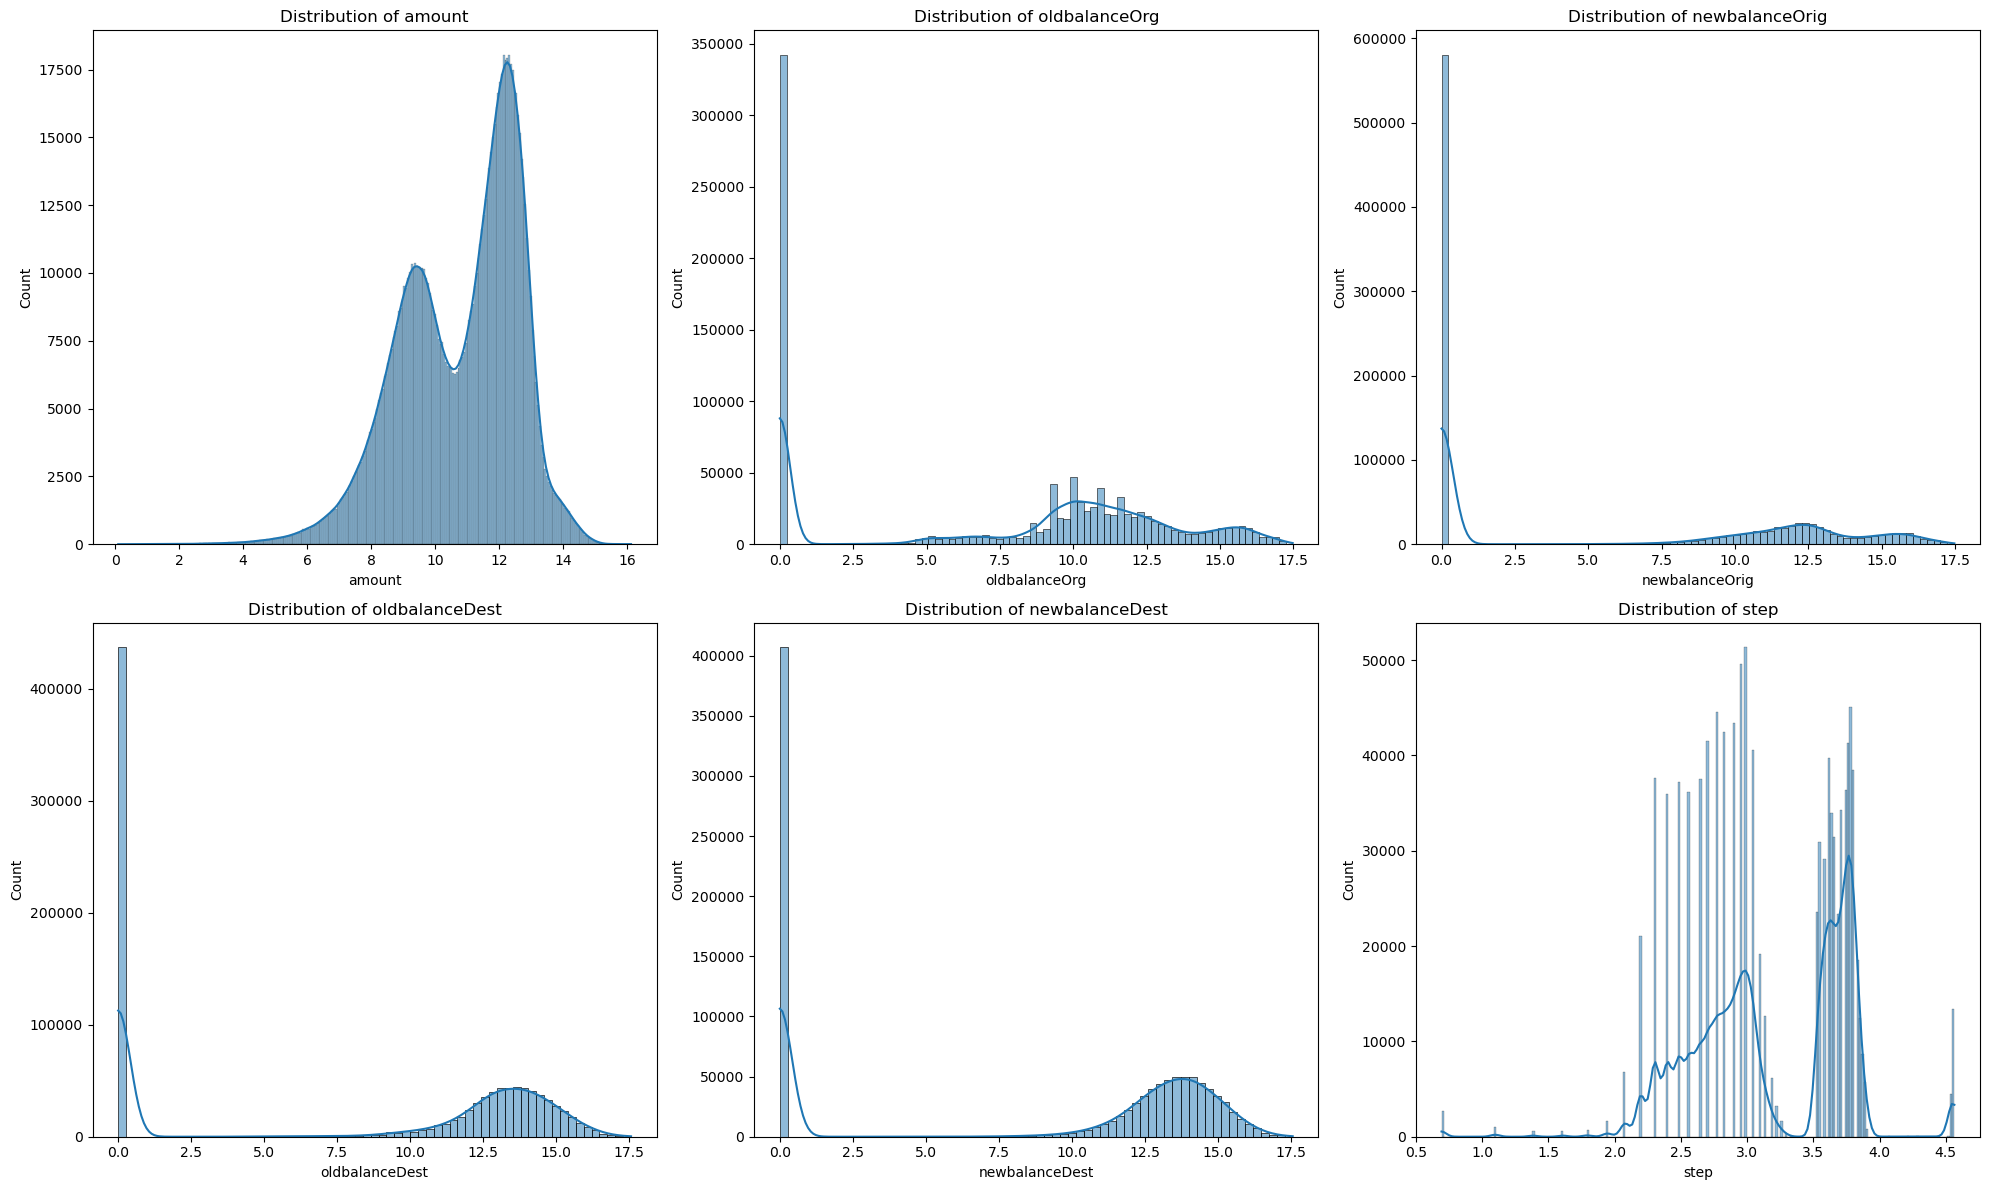

In [18]:
# Distribution of Numerical Features
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'step']
df_log_transformed = df.copy()
for col in numerical_cols:
    df_log_transformed[col] = np.log1p(df[col])
plt.figure(figsize=(20,12))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_log_transformed[column], kde=True)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

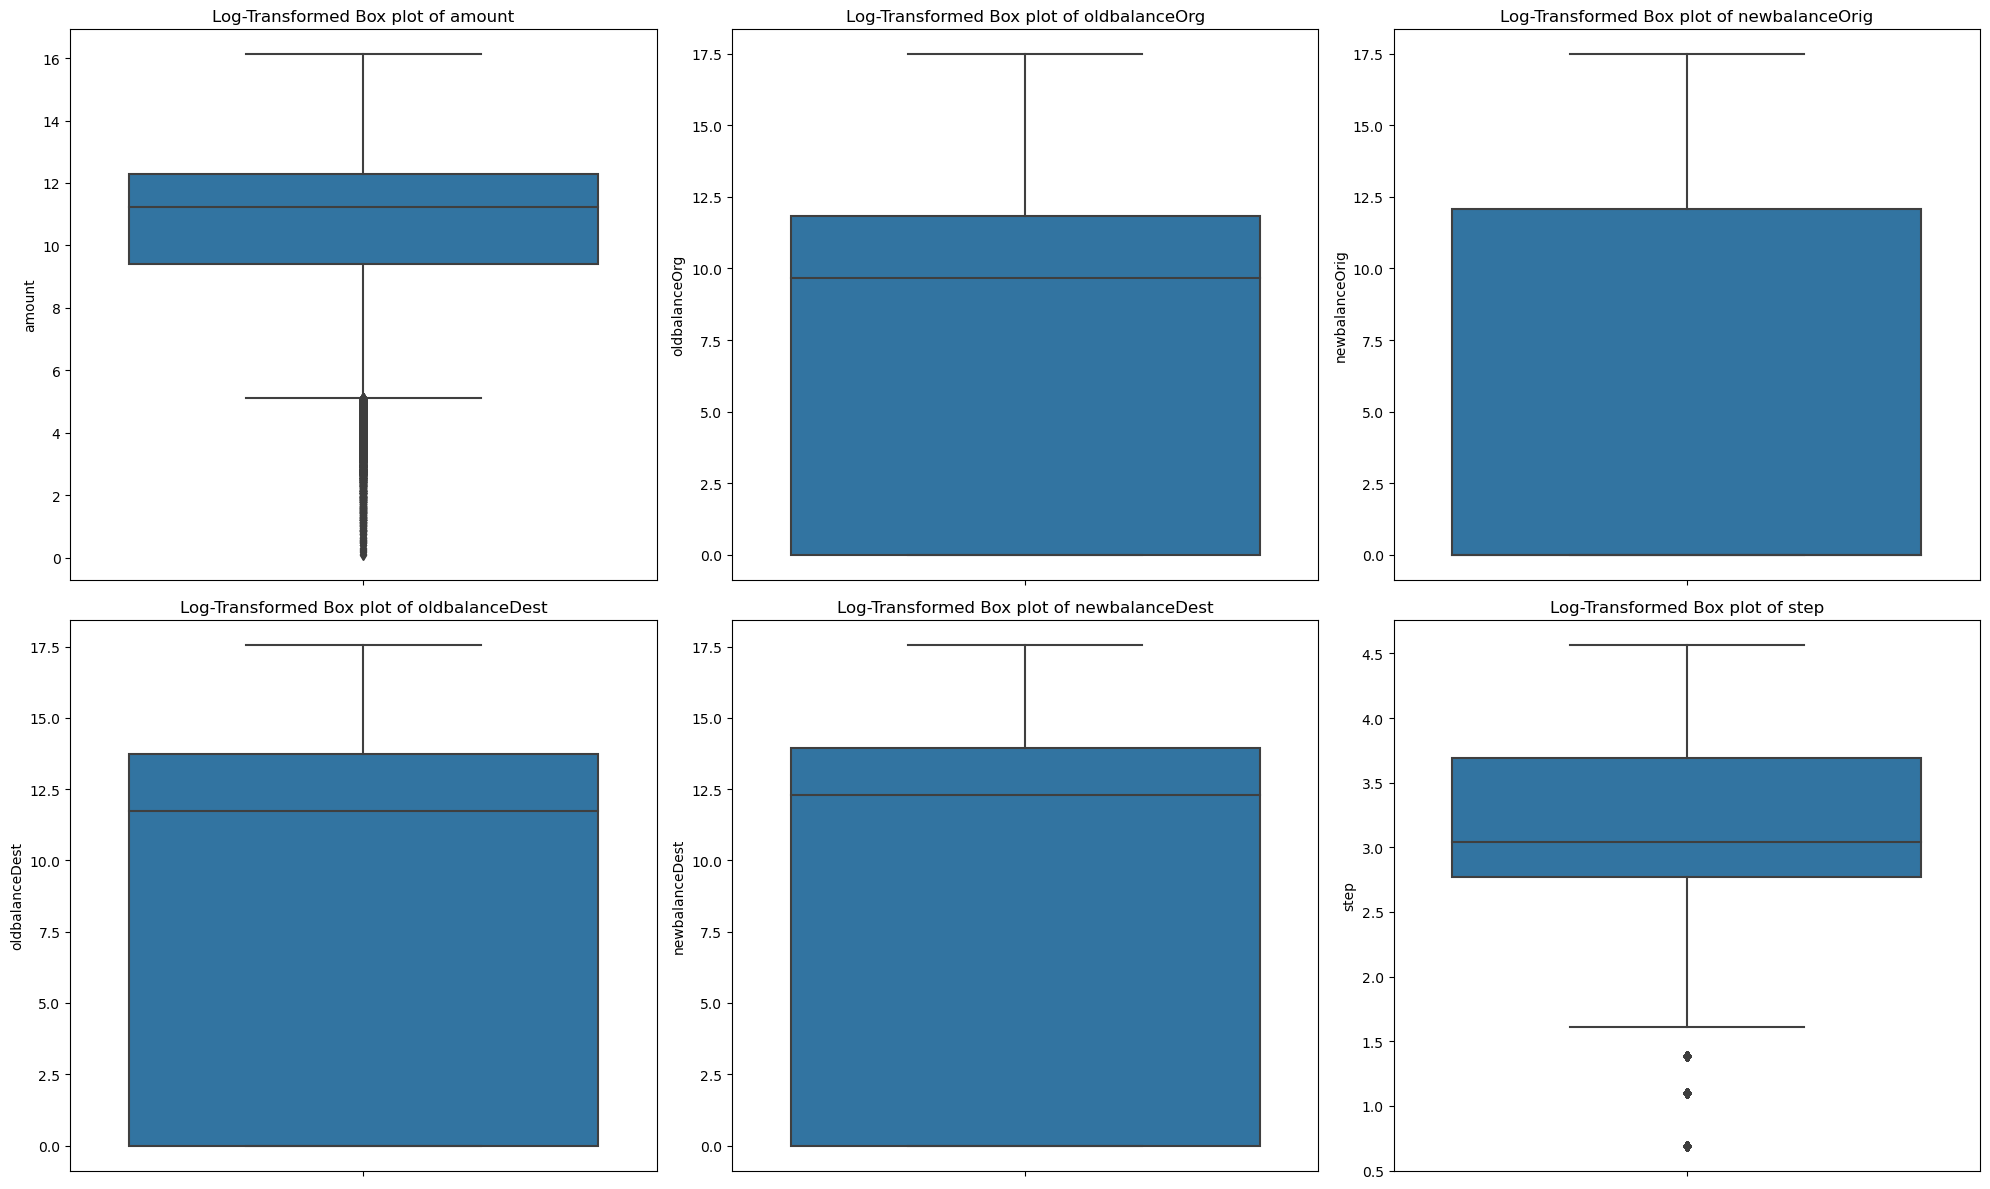

In [20]:
# Box Plots for Numerical Features with Log Transformation
plt.figure(figsize=(20, 12))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_log_transformed, y=column)
    plt.title(f'Log-Transformed Box plot of {column}')
    
plt.tight_layout()
plt.show()

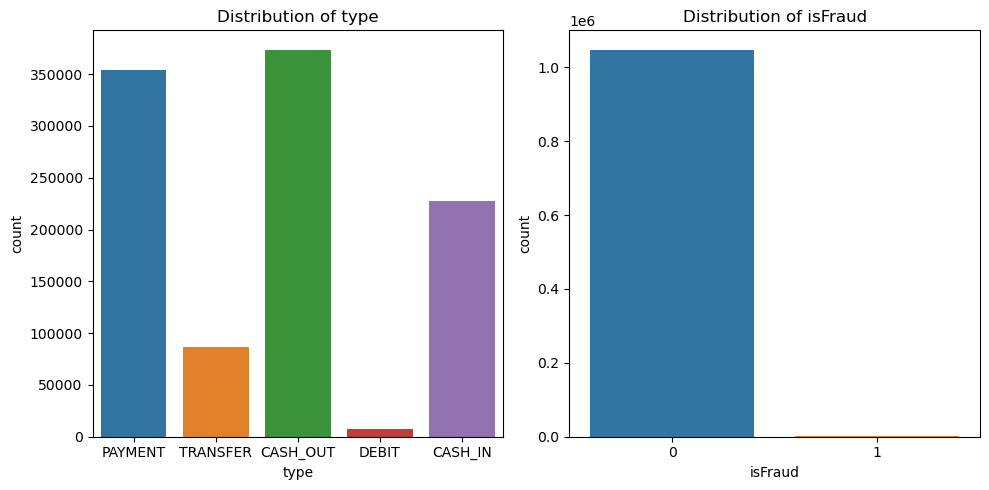

In [22]:
# Distribution of Categorical Features
categorical_cols = ['type','isFraud']

plt.figure(figsize=(10, 5))
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

In [155]:
df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

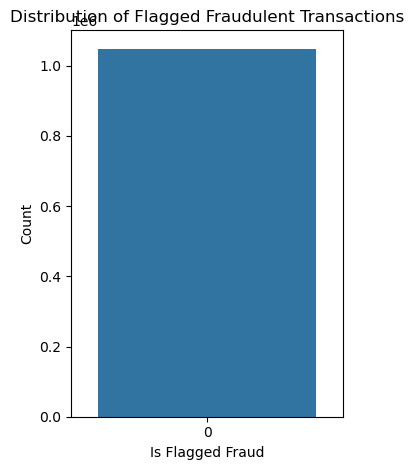

In [156]:
# Visualize the distribution of the 'isFlaggedFraud' column
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='isFlaggedFraud')
plt.title('Distribution of Flagged Fraudulent Transactions')
plt.xlabel('Is Flagged Fraud')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

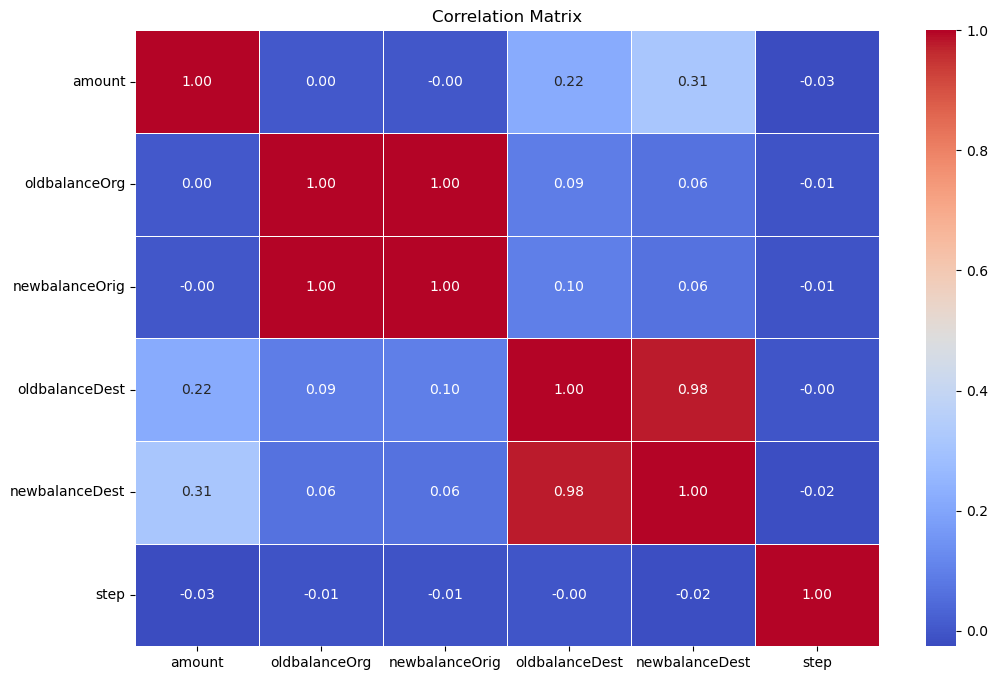

In [157]:
#Correlation matrix to find for collinearity between columns
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'step']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [101]:
#Check for collinearity between columns via VIF factor where >2.5 is collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, features):
    vif = pd.DataFrame()
    vif['Feature'] = features
    vif['VIF'] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif

vif_data = calculate_vif(df, numerical_cols)
print(vif_data)

          Feature         VIF
0          amount    1.642936
1   oldbalanceOrg  602.185054
2  newbalanceOrig  603.887951
3  oldbalanceDest   37.431967
4  newbalanceDest   40.245365


Here columns oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest re highly collinear hence collinearity will be removed via PCA or combining these columns.

In [99]:
#Outliers removal
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
    return df

numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data = remove_outliers(df, numerical_cols)

In [100]:
data.shape

(547217, 11)

## Combining Columns

In [102]:
# Define features and target
features = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
target = 'isFraud'

In [103]:
X = df[features]
y = df['isFraud']

In [104]:
# Create new features by subtracting old balance from new balance
X['balanceDifferenceOrg'] = X['newbalanceOrig'] - X['oldbalanceOrg']
X['balanceDifferenceDest'] = X['newbalanceDest'] - X['oldbalanceDest']

C:\Users\yukti\AppData\Local\Temp\ipykernel_4232\2702509757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['balanceDifferenceOrg'] = X['newbalanceOrig'] - X['oldbalanceOrg']
C:\Users\yukti\AppData\Local\Temp\ipykernel_4232\2702509757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['balanceDifferenceDest'] = X['newbalanceDest'] - X['oldbalanceDest']


In [105]:
# Now the new feature list after dropping oldbalance and newbalance columns
features_reduced = ['step', 'type', 'amount', 'balanceDifferenceOrg', 'balanceDifferenceDest']

In [106]:
X = X[features_reduced]

In [107]:
# Preprocessor for numerical features
numerical_cols = ['step', 'amount', 'balanceDifferenceOrg', 'balanceDifferenceDest']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])  # Standard scaling is applied here

In [108]:
# Preprocessor for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [109]:
# Combine all preprocessors in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, ['type'])])

In [110]:
# Model pipeline with RandomForestClassifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])


In [111]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [112]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['step', 'amount',
                                                   'balanceDifferenceOrg',
                                                   'balanceDifferenceDest']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                      

In [113]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [114]:
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [115]:
conf_matrix

array([[314223,      7],
       [    84,    259]], dtype=int64)

In [116]:
print('ROC-AUC Score:', roc_auc)

ROC-AUC Score: 0.9411293690374982


### ROC-AUC Score: 0.9411293690374982

In [117]:
feature_importance = model.named_steps['classifier'].feature_importances_

In [118]:
numerical_features = preprocessor.transformers_[0][1].named_steps['scaler'].get_feature_names_out(numerical_cols).tolist()
categorical_features = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(['type']).tolist()

In [119]:
feature_names = numerical_features + categorical_features

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                 Feature  Importance
2   balanceDifferenceOrg    0.314139
0                   step    0.294294
3  balanceDifferenceDest    0.225150
1                 amount    0.129657
8          type_TRANSFER    0.019552
5          type_CASH_OUT    0.014932
7           type_PAYMENT    0.001655
4           type_CASH_IN    0.000496
6             type_DEBIT    0.000124


## Using PCA OF COLUMNS

In [120]:
# Define features and target
features1 = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
target1 = 'isFraud'

X1 = df[features1]
y1= df[target1]

In [121]:
numerical_cols1 = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
high_vif_cols1 = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


In [122]:
# Preprocessor for numerical features
numerical_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [123]:
# Preprocessor for high-VIF numerical features with PCA
from sklearn.decomposition import PCA
pca_transformer = Pipeline(steps=[
    ('pca', PCA(n_components=2))])  # Adjust n_components as necessary

In [124]:
# Preprocessor for categorical features
categorical_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [125]:
# Combine all preprocessors in ColumnTransformer
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer1, [col for col in numerical_cols1 if col not in high_vif_cols1]),
        ('pca_num', pca_transformer, high_vif_cols1),
        ('cat', categorical_transformer1, ['type'])])

In [136]:
# Model pipeline with RandomForestClassifier
model1 = Pipeline(steps=[('preprocessor', preprocessor1),
                        ('classifier', RandomForestClassifier(random_state=42))])


In [137]:
# Split dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42, stratify=y1)


In [138]:
# Train the model
model1.fit(X1_train, y1_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['step', 'amount']),
                                                 ('pca_num',
                                                  Pipeline(steps=[('pca',
                                                                   PCA(n_components=2))]),
                                                  ['oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalance

In [139]:
y1_pred = model1.predict(X1_test)
y1_pred_proba = model1.predict_proba(X1_test)[:, 1]

In [140]:
classification_rep1 = classification_report(y1_test, y1_pred)
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
roc_auc1 = roc_auc_score(y1_test, y1_pred_proba)

print(classification_rep1)
print(conf_matrix1)
print('ROC-AUC Score:', roc_auc1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.99      0.75      0.85       343

    accuracy                           1.00    314573
   macro avg       1.00      0.87      0.93    314573
weighted avg       1.00      1.00      1.00    314573

[[314228      2]
 [    87    256]]
ROC-AUC Score: 0.9262441375275339


### ROC-AUC Score: 0.9262441375275339